# Multi variable linear regression

### formula


# importing modules

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use("fivethirtyeight")

# importing data

In [2]:
data = pd.read_csv("house_pred.csv")
data.drop("Id",axis = 1,inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# data preprocessing

In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1].values
cleaned_data = x

### cleaning data

#### if 75 percent of the rows of column are null drop it

In [4]:
def drop_columns_with_all_null(dataset):
    null_threshold = len(dataset) * 0.75
    cleaned_dataset = dataset.dropna(axis=1, thresh=null_threshold)
    return cleaned_dataset

In [5]:
cleaned_data = drop_columns_with_all_null(data)
cleaned_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


### finding if any null values exist in that column

In [6]:
def print_null_counts(dataset):
    for column in dataset.columns:
        null_count = dataset[column].isnull().sum()
        print(f"Column '{column}': {null_count} null values")

def number_of_columns_with_atleast_1_null_values(dataset):
    columns_with_null_values = dataset.columns[dataset.isnull().any()].tolist()
    return columns_with_null_values


In [7]:
print_null_counts(cleaned_data)
print(f"number of columns with null values:{number_of_columns_with_atleast_1_null_values(cleaned_data)}")

Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 259 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrArea': 8 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BsmtQual': 37 null values
Column 'BsmtCond': 37 null valu

### replacing null values by mode of that column

In [8]:
def replace_null_with_mode(dataset):
    fixed_dataset = dataset.copy()

    for column in dataset.columns:
        mode_value = dataset[column].mode()[0]
        fixed_dataset[column].fillna(mode_value, inplace=True)

    return fixed_dataset



In [9]:
cleaned_data = replace_null_with_mode(cleaned_data)
cleaned_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
print(f"number of columns with null values:{number_of_columns_with_atleast_1_null_values(cleaned_data)}")

number of columns with null values:[]


### encoding the categorical data

In [11]:
def encode_categorical_columns(dataset):
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns,dtype=int)
    return encoded_dataset

def remove_categorical_columns(dataset):
    non_categorical_columns = dataset.select_dtypes(exclude=['object']).columns
    new_dataset = dataset[non_categorical_columns]
    return new_dataset


In [12]:
#creating a dataset that has all columns exceot the ones with categorical data
non_categorical_columns = remove_categorical_columns(cleaned_data)
non_categorical_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [13]:
cleaned_data = encode_categorical_columns(cleaned_data)
cleaned_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


# calculating collinearity / variance inflation factor in the data

In [14]:
def calculate_vif(dataset, vif_threshold=3):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataset.columns

    try:
        vif_values = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
        vif_values = np.where(np.isinf(vif_values), vif_threshold, vif_values)
        vif_data["VIF"] = vif_values
    except Exception as e:
        print(f"Error calculating VIF: {e}")
        vif_data["VIF"] = vif_threshold

    return vif_data

In [15]:
vif_data = calculate_vif(non_categorical_columns)
vif_data

/home/bhargav/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,MSSubClass,4.763801
1,LotFrontage,15.742611
2,LotArea,2.662029
3,OverallQual,76.583282
4,OverallCond,42.491854
5,YearBuilt,20164.669967
6,YearRemodAdd,22395.208669
7,MasVnrArea,1.878120
8,BsmtFinSF1,3.000000
9,BsmtFinSF2,3.000000


### removing the columns with vif > 3

In [17]:
def remove_high_vif_columns(dataset, vif_data, threshold=3):
    high_vif_columns = vif_data[vif_data['VIF'] > threshold]['Variable'].tolist()
    new_dataset = dataset.drop(columns=high_vif_columns, axis=1)
    return new_dataset


In [19]:
final_data = remove_high_vif_columns(cleaned_data,vif_data)

In [20]:
final_data

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,150,856,856,854,0,1710,...,0,0,0,1,0,0,0,0,1,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,...,0,0,0,1,0,0,0,0,1,0
2,11250,162.0,486,0,434,920,920,866,0,1786,...,0,0,0,1,0,0,0,0,1,0
3,9550,0.0,216,0,540,756,961,756,0,1717,...,0,0,0,1,1,0,0,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0.0,0,0,953,953,953,694,0,1647,...,0,0,0,1,0,0,0,0,1,0
1456,13175,119.0,790,163,589,1542,2073,0,0,2073,...,0,0,0,1,0,0,0,0,1,0
1457,9042,0.0,275,0,877,1152,1188,1152,0,2340,...,0,0,0,1,0,0,0,0,1,0
1458,9717,0.0,49,1029,0,1078,1078,0,0,1078,...,0,0,0,1,0,0,0,0,1,0


# building the function to find the coefficents

In [23]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
x = final_data
y = y

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

### training the model

In [28]:
model = LinearRegression()

In [71]:
model.fit(xtrain,ytrain)

LinearRegression()

### model on test data

In [31]:
y_test_pred = model.predict(xtest)

# vizuvalization

## test data

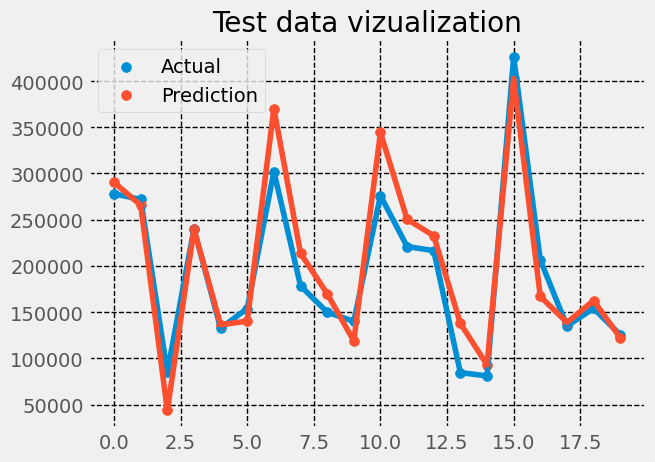

In [64]:
xtest_fake = np.arange(0,len(ytest))
plt.plot(xtest_fake[0:20],ytest[0:20])
plt.scatter(xtest_fake[0:20],ytest[0:20],label = "Actual",s=50)
plt.plot(xtest_fake[0:20],y_test_pred[0:20])
plt.scatter(xtest_fake[0:20],y_test_pred[0:20],label = "Prediction",s=50)
plt.grid(visible = "True",linestyle="--",color = "black")
plt.title("Test data vizualization")
plt.legend()
plt.show()

## train data

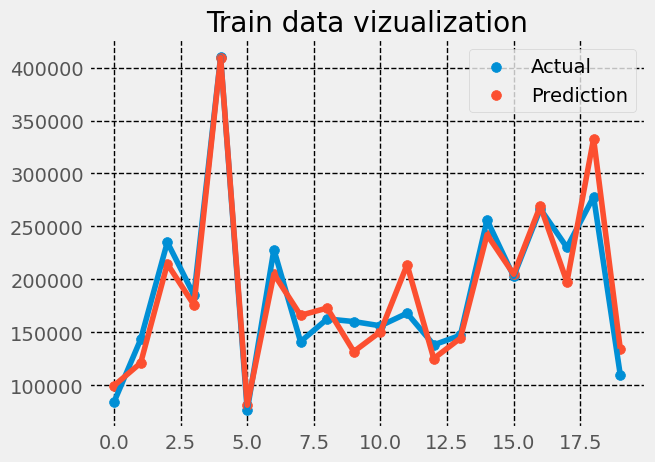

In [66]:
xtrain_fake = np.arange(0,len(ytrain))
y_train_pred = model.predict(xtrain)
plt.scatter(xtrain_fake[0:20],ytrain[0:20],label = "Actual",s=50)
plt.plot(xtrain_fake[0:20],ytrain[0:20])
plt.scatter(xtrain_fake[0:20],y_train_pred[0:20],label = "Prediction",s=50)
plt.plot(xtrain_fake[0:20],y_train_pred[0:20])
plt.grid(visible = "True",linestyle="--",color = "black")
plt.title("Train data vizualization")
plt.legend()
plt.show()